<a href="https://colab.research.google.com/github/SeunghoGhim/study2/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/30
225/225 [==============================] - ETA: 0s - loss: 0.6024 - accuracy: 0.7904
Epoch 1: val_loss improved from inf to 0.35127, saving model to ./model/Fashion_MNIST_CNN.hdf5
225/225 [==============================] - 134s 585ms/step - loss: 0.6024 - accuracy: 0.7904 - val_loss: 0.3513 - val_accuracy: 0.8729
Epoch 2/30
225/225 [==============================] - ETA: 0s - loss: 0.3752 - accuracy: 0.8673
Epoch 2: val_loss improved from 0.35127 to 0.30116, saving model to ./model/Fashion_MNIST_CNN.hdf5
225/225 [==============================] - 134s 595ms/step - loss: 0.3752 - accuracy: 0.8673 - val_loss: 0.3012 - val_accuracy: 0.8885
Epoch 3/30
225/225 [==============================] - ETA: 0s - loss: 0.3172 - accuracy: 0.8867
Epoch 3: val_loss improved from 0.30116 to 0.27014, saving model to ./model/Fashion_MNIST_CNN.hdf5
225/225 [==============================] - 124s 551ms/step - loss: 0.3172 - accuracy: 0.8867 - val_loss: 0.2701 - val_accuracy: 0.9000
Epoch 4/30
225

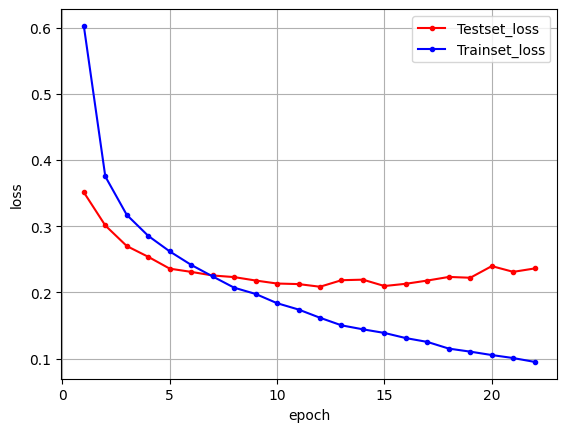

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import os

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

cmodel = Sequential()
cmodel.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
cmodel.add(Conv2D(64, (3, 3), activation='relu'))
cmodel.add(MaxPooling2D(pool_size=(2, 2)))
cmodel.add(Dropout(0.25))
cmodel.add(Flatten())
cmodel.add(Dense(128, activation='relu'))
cmodel.add(Dropout(0.5))
cmodel.add(Dense(10, activation='softmax'))

cmodel.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = "./model/Fashion_MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = cmodel.fit(x_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=1,
                    callbacks=[early_stopping_callback, checkpointer])

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = range(1, len(y_loss) + 1)
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
print("Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

313/313 [==============================] - 8s 26ms/step - loss: 0.2531 - accuracy: 0.9226

Test Accuracy: 0.9226
